<table align="left">
  <td>
    <a href="https://is.gd/zqA0WI" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>
  </td>
</table>

## Ejemplo 1. Segmentación de Imagenes con Clustering

In [1]:
# Python ≥3.5 is required
import sys
assert sys.version_info >= (3, 5)

# Scikit-Learn ≥0.20 is required
import sklearn
assert sklearn.__version__ >= "0.20"

# Common imports
import numpy as np
import os

# to make this notebook's output stable across runs
np.random.seed(42)

# To plot pretty figures
%matplotlib inline
import matplotlib as mpl
import matplotlib.pyplot as plt
mpl.rc('axes', labelsize=14)
mpl.rc('xtick', labelsize=12)
mpl.rc('ytick', labelsize=12)


from sklearn.cluster import KMeans

In [2]:
import cv2
from google.colab.patches import cv2_imshow
!wget https://raw.githubusercontent.com/DiegoPaezA/handson-ml2/master/images/unsupervised_learning/ladybug.png
image_cv = cv2.imread('ladybug.png')
image = cv2.cvtColor(image_cv, cv2.COLOR_BGR2RGB)	

--2022-04-01 12:00:12--  https://raw.githubusercontent.com/DiegoPaezA/handson-ml2/master/images/unsupervised_learning/ladybug.png
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.111.133, 185.199.108.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.111.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 574025 (561K) [image/png]
Saving to: ‘ladybug.png’

ladybug.png         100%[===================>] 560.57K  --.-KB/s    in 0.05s   

2022-04-01 12:00:12 (10.6 MB/s) - ‘ladybug.png’ saved [574025/574025]



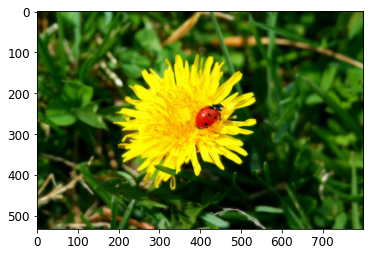

In [3]:
#cv2_imshow(image)
plt.imshow(image)

In [4]:
image.shape

(533, 800, 3)

### Se aplica K-Means

Se utilizan 8 cluster para representar la imagen. 

In [5]:
X = image.reshape(-1, 3)
k= 8
kmeans = KMeans(n_clusters=k, random_state=42).fit(X)
segmented_img = kmeans.cluster_centers_[kmeans.labels_]
segmented_img = segmented_img.reshape(image.shape)

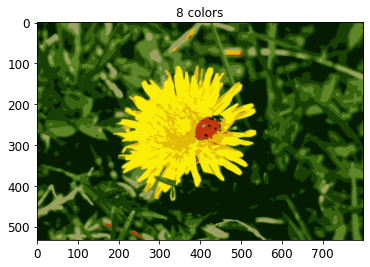

In [7]:
plt.title("{} colors".format(k))
plt.imshow(image.astype('uint8'))
plt.imshow(segmented_img.astype('uint8'))

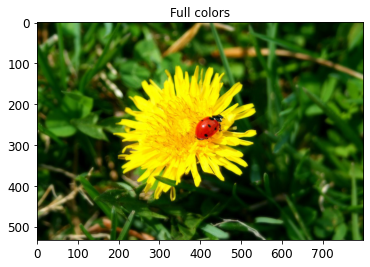

In [9]:
plt.title("{} colors".format("Full"))
plt.imshow(image.astype('uint8'))

Se aplica kmeans con 2 a 10 cluster, para comparar la información presentada en las imagenes. 

In [10]:
segmented_imgs = []
n_colors = (10, 8, 6, 4, 2)
for n_clusters in n_colors:
    kmeans = KMeans(n_clusters=n_clusters, random_state=42).fit(X)
    segmented_img = kmeans.cluster_centers_[kmeans.labels_]
    segmented_imgs.append(segmented_img.reshape(image.shape))

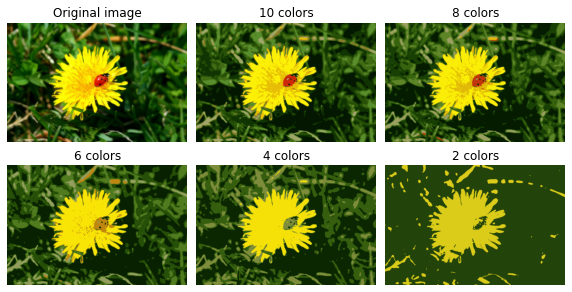

In [11]:
plt.figure(figsize=(10,5))
plt.subplots_adjust(wspace=0.05, hspace=0.1)

plt.subplot(231)
plt.imshow(image)
plt.title("Original image")
plt.axis('off')

for idx, n_clusters in enumerate(n_colors):
    plt.subplot(232 + idx)
    plt.imshow(segmented_imgs[idx].astype('uint8'))
    plt.title("{} colors".format(n_clusters))
    plt.axis('off')
plt.show()